In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
m=np.zeros((16,16),dtype=int)
for i in range(16):
    m[i,(i+1)%16]=1
    m[(i+1)%16,i]=1
e=((1,6),(1,12),(2,10),(2,13),(3,7),(3,15),(4,9),(4,12))
d=(-1,3,7,11)
for X,Y in e:
    for j in d:
        m[(X+j)%16,(Y+j)%16]=1

In [9]:
rs=[[[]for j in range(16)]for i in range(16)]
for b in range(16):
    s=set(range(16))
    s.remove(b)
    r=[[b]]
    while s:
        t=r.copy()
        ns=set()
        r=[]
        for i in t:
            l=i[-1]
            for j in range(16):
                if m[l][j] and j in s:
                    rs[b][j].append(i+[j])
                    r.append(i+[j])
                    ns.add(j)
        s=s.difference(ns)
for i in range(2):
    t=rs[i]
    for j in range(5):
        if i==j:
            continue
        print((i+1,j+1),*map(lambda x:[y+1 for y in x],t[j]),sep='\t')

(1, 2)	[1, 2]
(1, 3)	[1, 2, 3]
(1, 4)	[1, 12, 4]
(1, 5)	[1, 6, 5]	[1, 16, 5]
(2, 1)	[2, 1]
(2, 3)	[2, 3]
(2, 4)	[2, 3, 4]
(2, 5)	[2, 10, 5]


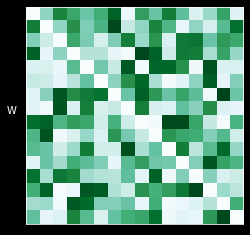

In [10]:
w=np.loadtxt("data.csv", delimiter=",")
plt.imshow(w, cmap='BuGn')
plt.xticks([])
plt.yticks([])
plt.ylabel('W      ', rotation=0)
plt.show()

((0, 2), [[0, 1, 2]])


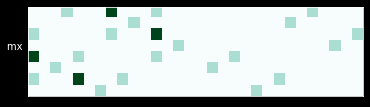

In [13]:
ps=[]
for i in range(16):
    t=rs[i]
    for j in range(16):
        if i==j:
            continue
        ps.append(((i,j),t[j]))
print(ps[1])
mx=[len(p[1])for p in ps]+[2]
plt.imshow(np.array(mx[:-1]).reshape(8,30),cmap='BuGn')
plt.xticks([])
plt.yticks([])
plt.ylabel('mx      ',rotation=0)
plt.show()
mx=np.array(mx)

0 %


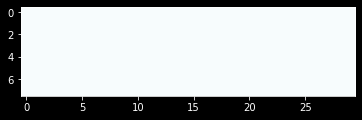

1 %


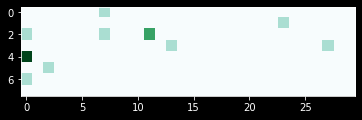

2 %


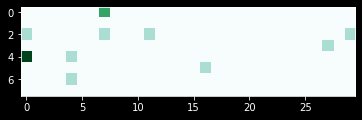

3 %


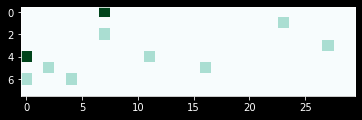

4 %


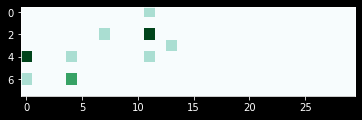

5 %


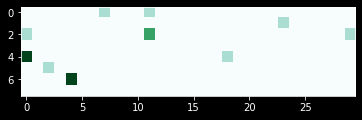

6 %


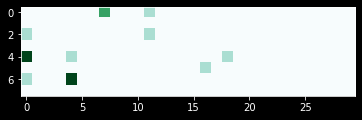

7 %


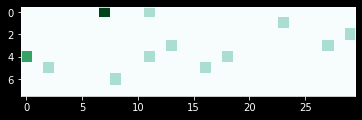

8 %


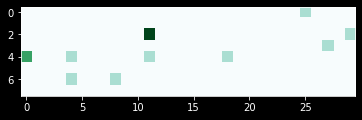

9 %


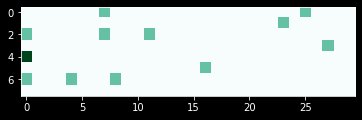

10 %


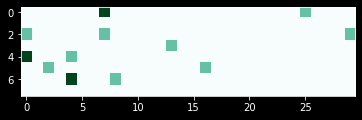

11 %


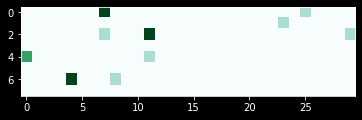

12 %


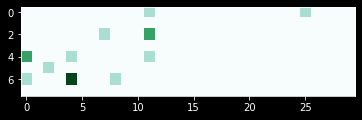

KeyboardInterrupt: 

In [90]:
ans=999
ppp=mx[:-1].prod()
pp={}
for i in range(100):
    pp[ppp//100*i]=i
qq=0
def gen_n():
    n=np.array(([0 for x in range(241)]))
    while n[-1]==0:
        yield n
        n[0]+=1
        i=0
        while n[i]>=mx[i]:
            n[i]=0
            i+=1
            n[i]+=1
for n in gen_n():
    if qq in pp:
        print(pp[qq],'%')
        plt.imshow(np.array(n[:-1]).reshape(8,30),cmap='BuGn')
        plt.show()
    qq+=1
    c=[0 for x in range(16)]
    d=[0 for x in range(16)]
    for i in range(240):
        (x,y),r=ps[i]
        weight=w[x,y]
        for j in r[n[i]][1:-1]:
            c[j]+=weight
            d[j]+=1
    if max(c)<ans:
        ans=max(c)
        ansn=n.copy()
        maxc=c.copy()
        maxd=d.copy()
np.savetxt('n.csv',n,delimiter=',',fmt='%d')
plt.imshow(np.array(ansn[:-1]).reshape(8,30),cmap='BuGn')
plt.xticks([])
plt.yticks([])
plt.ylabel('n      ',rotation=0)
plt.show()

In [ ]:
c=[0 for x in range(16)]
for i in range(240):
    (x,y),r=ps[i]
    weight=w[x,y]
    for j in r[n[i]][1:-1]:
        c[j]+=weight
print(ans)
print(*c)
plt.imshow(np.array([0]+c).reshape(1,17),cmap='BuGn')
plt.xticks([])
plt.yticks([])
plt.ylabel('c      ',rotation=0)
plt.show()